In [1]:
import numpy as np
import pandas as pd

## Loading the Data

In [2]:
df1=pd.read_csv('/content/sample_data/fenixOpened.csv')
print(df1.shape)
df1.head()

(506, 503)


,issue_labels,issue_title,issue_body,issue_comments,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 493,Unnamed: 494,Unnamed: 495,Unnamed: 496,Unnamed: 497,Unnamed: 498,Unnamed: 499,Unnamed: 500,Unnamed: 501,Unnamed: 502
0,"['feature request 🌟', 'pin']",Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,"[{'user': 'Grisha Kruglov', 'user_id': 465422,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['feature request 🌟', 'Feature:Gesture', 'pin']",[Meta] Gestures,We want to support the following gestures: \n\...,"[{'user': 'Barbara Bermes', 'user_id': 122897,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['🙅 waiting', 'needs:gv', 'Feature:Offline', '...",[Meta] Save Page Offline,### Why/User Benefit/User Problem\r\nAs a user...,"[{'user': 'Chris Peterson', 'user_id': 629193,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['feature request 🌟', '🙅 waiting', 'needs:gv',...",Autofill Addresses on sites,"### Why/User Benefit/User Problem\nAs a user, ...","[{'user': 'Stefan Arentz', 'user_id': 28052, '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['feature request 🌟', 'Feature:AndroidIntegrat...",[Meta] Distribution Setup,### Why/User Benefit/User Problem\n* Allow par...,"[{'user': 'Michael Kaply', 'user_id': 345868, ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [3]:
df1=df1[['issue_title','issue_body','issue_comments']]
df1.head()

,issue_title,issue_body,issue_comments
0,Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,"[{'user': 'Grisha Kruglov', 'user_id': 465422,..."
1,[Meta] Gestures,We want to support the following gestures: \n\...,"[{'user': 'Barbara Bermes', 'user_id': 122897,..."
2,[Meta] Save Page Offline,### Why/User Benefit/User Problem\r\nAs a user...,"[{'user': 'Chris Peterson', 'user_id': 629193,..."
3,Autofill Addresses on sites,"### Why/User Benefit/User Problem\nAs a user, ...","[{'user': 'Stefan Arentz', 'user_id': 28052, '..."
4,[Meta] Distribution Setup,### Why/User Benefit/User Problem\n* Allow par...,"[{'user': 'Michael Kaply', 'user_id': 345868, ..."


In [4]:
df1.isnull().sum()

issue_title       0
issue_body        1
issue_comments    0
dtype: int64

In [5]:
data_opened=df1.dropna()
data_opened.head()

,issue_title,issue_body,issue_comments
0,Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,"[{'user': 'Grisha Kruglov', 'user_id': 465422,..."
1,[Meta] Gestures,We want to support the following gestures: \n\...,"[{'user': 'Barbara Bermes', 'user_id': 122897,..."
2,[Meta] Save Page Offline,### Why/User Benefit/User Problem\r\nAs a user...,"[{'user': 'Chris Peterson', 'user_id': 629193,..."
3,Autofill Addresses on sites,"### Why/User Benefit/User Problem\nAs a user, ...","[{'user': 'Stefan Arentz', 'user_id': 28052, '..."
4,[Meta] Distribution Setup,### Why/User Benefit/User Problem\n* Allow par...,"[{'user': 'Michael Kaply', 'user_id': 345868, ..."


In [6]:
data_opened.isnull().sum()

issue_title       0
issue_body        0
issue_comments    0
dtype: int64

In [7]:
df2=pd.read_csv('/content/sample_data/fenixClosed.csv')
print(df2.shape)
df2.head()

(753, 344)


,issue_body,issue_comments,issue_labels,issue_title,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 334,Unnamed: 335,Unnamed: 336,Unnamed: 337,Unnamed: 338,Unnamed: 339,Unnamed: 340,Unnamed: 341,Unnamed: 342,Unnamed: 343
0,### Why/User Benefit/User Problem\nCrash pings...,"[{'user': 'Daosheng Mu', 'user_id': 1263177, '...","['P1', 'Feature:Telemetry', 'Feature:CrashRepo...",FNX-5609 ⁃ Send crash reports to Glean,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* [x] Build on taskcluster\n* [x] Run (unit) t...,[],['eng:automation'],FNX2-15675 ⁃ Setup basic CI infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### User Story:\r\n-As a user I can choose to ...,"[{'user': 'Sebastian Kaspari', 'user_id': 8963...",['Feature:CrashReporting'],[Meta] Crash Reporting,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,[],['eng:automation'],FNX2-15676 ⁃ Create preview builds from master...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Why\n\nWhat\n\nIdeas:\n\n* QR code reader in a...,[],"['feature request 🌟', 'P3', 'Feature:QRCode']",FNX2-16280 ⁃ Built-in first-class experience f...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2=df2[['issue_title','issue_body','issue_comments']]
df2.head()

,issue_title,issue_body,issue_comments
0,FNX-5609 ⁃ Send crash reports to Glean,### Why/User Benefit/User Problem\nCrash pings...,"[{'user': 'Daosheng Mu', 'user_id': 1263177, '..."
1,FNX2-15675 ⁃ Setup basic CI infrastructure,* [x] Build on taskcluster\n* [x] Run (unit) t...,[]
2,[Meta] Crash Reporting,### User Story:\r\n-As a user I can choose to ...,"[{'user': 'Sebastian Kaspari', 'user_id': 8963..."
3,FNX2-15676 ⁃ Create preview builds from master...,NaN,[]
4,FNX2-16280 ⁃ Built-in first-class experience f...,Why\n\nWhat\n\nIdeas:\n\n* QR code reader in a...,[]


In [9]:
df2.isnull().sum()

issue_title        3
issue_body        72
issue_comments     0
dtype: int64

In [10]:
data_closed=df2.dropna()
data_closed.head()

,issue_title,issue_body,issue_comments
0,FNX-5609 ⁃ Send crash reports to Glean,### Why/User Benefit/User Problem\nCrash pings...,"[{'user': 'Daosheng Mu', 'user_id': 1263177, '..."
1,FNX2-15675 ⁃ Setup basic CI infrastructure,* [x] Build on taskcluster\n* [x] Run (unit) t...,[]
2,[Meta] Crash Reporting,### User Story:\r\n-As a user I can choose to ...,"[{'user': 'Sebastian Kaspari', 'user_id': 8963..."
4,FNX2-16280 ⁃ Built-in first-class experience f...,Why\n\nWhat\n\nIdeas:\n\n* QR code reader in a...,[]
17,FNX3-16293 ⁃ [UX] Request Desktop Site,Mockup:\nhttps://mozilla.invisionapp.com/share...,"[{'user': 'Stephen Horlander', 'user_id': 6844..."


In [11]:
data_closed.isnull().sum()

issue_title       0
issue_body        0
issue_comments    0
dtype: int64

In [12]:
data=pd.concat([data_opened,data_closed])
print(data.shape)
data.head()

(1183, 3)


,issue_title,issue_body,issue_comments
0,Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,"[{'user': 'Grisha Kruglov', 'user_id': 465422,..."
1,[Meta] Gestures,We want to support the following gestures: \n\...,"[{'user': 'Barbara Bermes', 'user_id': 122897,..."
2,[Meta] Save Page Offline,### Why/User Benefit/User Problem\r\nAs a user...,"[{'user': 'Chris Peterson', 'user_id': 629193,..."
3,Autofill Addresses on sites,"### Why/User Benefit/User Problem\nAs a user, ...","[{'user': 'Stefan Arentz', 'user_id': 28052, '..."
4,[Meta] Distribution Setup,### Why/User Benefit/User Problem\n* Allow par...,"[{'user': 'Michael Kaply', 'user_id': 345868, ..."


## Text Preprocessing

the Preprocessing phase we do the following in the order below:-

1. Removing the json format 
2. Removing the html tags
3. Remove any punctuations or limited set of special characters like , or . or # etc.
4. Check if the word is made up of english letters and is not alpha-numeric
5. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
6. Convert the word to lowercase
7. Remove Stopwords
8. Finally Snowball Stemming the word (better than Porter Stemming)<br>

In [13]:
def filter_comment(s):
    index=s.find('body')
    index+=8
    return s[index:-4]
        

In [14]:
data['issue_comments']=data['issue_comments'].apply(filter_comment)
data.head()

,issue_title,issue_body,issue_comments
0,Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,cc @helfi92 this might be of interest to you
1,[Meta] Gestures,We want to support the following gestures: \n\...,"Not clear what that entails, could you please ..."
2,[Meta] Save Page Offline,### Why/User Benefit/User Problem\r\nAs a user...,GV API to tell Gecko to enter offline browsing...
3,Autofill Addresses on sites,"### Why/User Benefit/User Problem\nAs a user, ...",@bbinto this should probably be moved out of t...
4,[Meta] Distribution Setup,### Why/User Benefit/User Problem\n* Allow par...,I'm going to update this issue with more detai...


In [15]:
def filter_issue_body(s):
    j=0
    for i in s:
        if(i=='#'):
            j+=1
        else:
            break
    return s[j:]

In [16]:
data['issue_body']=data['issue_body'].apply(filter_issue_body)
data.head()

,issue_title,issue_body,issue_comments
0,Instrument the automation pipeline via Amplitude,Main assumption behind this effort (and issues...,cc @helfi92 this might be of interest to you
1,[Meta] Gestures,We want to support the following gestures: \n\...,"Not clear what that entails, could you please ..."
2,[Meta] Save Page Offline,"Why/User Benefit/User Problem\r\nAs a user, I...",GV API to tell Gecko to enter offline browsing...
3,Autofill Addresses on sites,"Why/User Benefit/User Problem\nAs a user, I w...",@bbinto this should probably be moved out of t...
4,[Meta] Distribution Setup,Why/User Benefit/User Problem\n* Allow partne...,I'm going to update this issue with more detai...


In [17]:
data['issue_comments'].values[25]
print('-'*100)
data['issue_comments'].values[20]

----------------------------------------------------------------------------------------------------


'We need to figure out if we want this to the MVP, because that will not only include UX and Eng implementation but also how we handle requests coming in etc.\'}, {\'user\': \'Tiffanie Shakespeare\', \'user_id\': 287322, \'user_site_admin\': False, \'body\': \'@vesta0 do you want to try to include this for Q3 and group it with #907?\\r\\n\\r\\nEither way, this is bigger than a bug and is a feature request requiring some design thinking so removing the need ux label.\'}, {\'user\': \'Kevin Brosnan\', \'user_id\': 250273, \'user_site_admin\': False, \'body\': \'This seems unrelated to #907 which is a dashboard for monitoring stability. This is about allowing users to provide more context around what they are doing when they crash.\'}, {\'user\': \'Tiffanie Shakespeare\', \'user_id\': 287322, \'user_site_admin\': False, \'body\': "@kbrosnan if we gather more info about a crash when a person reports it, that would help vesta understand more about the types of crashes. i would also assume i

In [18]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup

In [19]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
stopwords=list(stopwords)

In [20]:

def remove_shortcuts(phrase):
    phrase=re.sub(r"won't", "will not", phrase)
    phrase=re.sub(r"can\'t", "can not", phrase)
    phrase=re.sub(r"n\'t", " not", phrase)
    phrase=re.sub(r"\'re", " are", phrase)
    phrase=re.sub(r"\'s", " is", phrase)
    phrase=re.sub(r"\'d", " would", phrase)
    phrase=re.sub(r"\'ll", " will", phrase)
    phrase=re.sub(r"\'t", " not", phrase)
    phrase=re.sub(r"\'ve", " have", phrase)
    phrase=re.sub(r"\'m", " am", phrase)
    phrase=re.sub(r"{", "", phrase)
    phrase=re.sub(r"}", "", phrase)
    phrase=re.sub(r":", "", phrase)
    phrase=re.sub(r",", "", phrase)
    phrase=re.sub(r"\'", "", phrase)
    phrase=re.sub(r"@", "", phrase)
    
    return phrase

In [21]:
preprocessed_discussions=[]
#print(len(data_opened['issue_comments']))

for sentence in tqdm(data['issue_comments'].values):
    sentence=re.sub(r"http\S+", " ", sentence)  #removing links
    sentence=BeautifulSoup(sentence, 'lxml').get_text() #removing all HTML related tags
    sentence=remove_shortcuts(sentence)  # removing shortcuts
    sentence=re.sub("\S*\d\S*", " ", sentence).strip()  #
    sentence=re.sub('[^A-Za-z]+', ' ', sentence) #removing alphanumeric words
    
    sentence=' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_discussions.append(sentence.strip())


100%|██████████| 1183/1183 [00:02<00:00, 420.19it/s]


### Preprocessed Reviews

In [22]:
print(len(preprocessed_discussions))
print(preprocessed_discussions[:2])
#print(data_opened['issue_comments'].values[:2])

1183
['cc might interest', 'not clear entails could please provide info user stephen horlander user id user site admin false body figure swipe gestures list items e g swipe close swipe send etc user asif youssuff user id user site admin false body see user tiffanie shakespeare user id user site admin false body adding user jeff boek user id user site admin false body adding would nice home screen could swipe left right kill tab open instead pressing x button user tiffanie shakespeare user id user site admin false body refresh user tiffanie shakespeare user id user site admin false body user tiffanie shakespeare user id user site admin false body cannot swipe bottom gesture r n user vesta zare user id user site admin false body adding swipe go back website forward website user none user id user site admin false body would like suggest gesture switch tabs swiping address bar like chrome r nis intuitive e make mobile browsing much easier quicker user chris peterson user id user site admin

## Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#BoW
cv=CountVectorizer(min_df=10)
cv.fit(preprocessed_discussions)
print("some feature names ", cv.get_feature_names()[:10])
print('-'*100)

final_counts=cv.transform(preprocessed_discussions)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])
print('-'*100)


print(cv.get_feature_names()[:50])

some feature names  ['ability', 'able', 'aboutconfig', 'ac', 'accept', 'acceptance', 'access', 'accessibility', 'accessible', 'accidentally']
----------------------------------------------------------------------------------------------------
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (1183, 1460)
the number of unique words  1460
----------------------------------------------------------------------------------------------------
['ability', 'able', 'aboutconfig', 'ac', 'accept', 'acceptance', 'access', 'accessibility', 'accessible', 'accidentally', 'according', 'account', 'across', 'action', 'actions', 'active', 'activity', 'actual', 'actually', 'adam', 'add', 'added', 'adding', 'addition', 'additional', 'addon', 'address', 'addressed', 'adds', 'adjust', 'admin', 'advanced', 'afaik', 'affect', 'affected', 'affects', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'allow', 'allowed', 'allowing', 'allows', 'almeida', 'almost', 'alon

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Applying Bi-Grams, Tri-Grams and N_Grams on Bag of Words

In [24]:
cv=CountVectorizer(ngram_range=(2,2),min_df=5)
final_bigram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer: ",type(final_bigram_counts))
print("the shape of out text BoW vectorizer: ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams: ", final_bigram_counts.get_shape()[1])

the type of count vectorizer:  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer:  (1183, 1781)
the number of unique words including both unigrams and bigrams:  1781


In [25]:
cv=CountVectorizer(ngram_range=(3,3),min_df=5)
final_trigram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer: ",type(final_trigram_counts))
print("the shape of out text BoW vectorizer: ",final_trigram_counts.get_shape())
print("the number of unique words including unigrams, bigrams and tri-grams: ", final_trigram_counts.get_shape()[1])

the type of count vectorizer:  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer:  (1183, 639)
the number of unique words including unigrams, bigrams and tri-grams:  639


In [26]:
cv=CountVectorizer(ngram_range=(5,5),min_df=10)
final_5gram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer: ",type(final_5gram_counts))
print("the shape of out text BoW vectorizer: ",final_5gram_counts.get_shape())
print("the number of unique words including upto 5-grams: ", final_5gram_counts.get_shape()[1])

the type of count vectorizer:  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer:  (1183, 252)
the number of unique words including upto 5-grams:  252


# Topic Modelling

## Lemmatization

In [27]:
 ! python -m spacy download en_core_web_md

 #restart the runtime after runing this cell....

     |████████████████████████████████| 96.4 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [28]:
! pip install spacy

In [29]:
import spacy
import gensim
from gensim import corpora

nlp=spacy.load('en_core_web_md',disable=['parser','ner'])

def lemmatization(discussions,allowed_postags=['NOUN','ADJ']): 
    lemma_list=[]
    for sent in discussions:
        d=nlp(sent) 
        lemma_list.append([token.lemma_ for token in d if token.pos_ in allowed_postags ])
    
    return lemma_list

In [30]:
tokenized_discussions=lemmatization(preprocessed_discussions)

print(len(tokenized_discussions))
print(tokenized_discussions[1])

1183
['clear', 'entail', 'info', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'figure', 'gesture', 'list', 'item', 'g', 'close', 'swipe', 'send', 'user', 'user', 'site', 'admin', 'false', 'body', 'see', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'user', 'user', 'site', 'admin', 'false', 'body', 'nice', 'home', 'screen', 'right', 'kill', 'tab', 'open', 'x', 'button', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'refresh', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'bottom', 'gesture', 'r', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'swipe', 'website', 'forward', 'website', 'user', 'none', 'user', 'user', 'site', 'admin', 'false', 'body', 'gesture', 'switch', 'tab', 'address', 'bar', 'chrome', 'r', 'nis', 'mobile', 'easy', 'quick', 'user', 'user', 'user', 'site', 'admin', 'false', 'body', 'swipe', 'website', 'website', 'r', 'n', 'r', 'ngv', 'bug', 'navigation',

### Create vocabulary dictionary and document term matrix

In [31]:
dictionary=corpora.Dictionary(tokenized_discussions)
doc_term_matrix=[dictionary.doc2bow(token) for token in tokenized_discussions]

In [32]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,id2word=dictionary, num_topics=10, random_state=100,chunksize=1000, passes=50,iterations=100)
prob_list=lda_model.print_topics()

prob_list

[(0,
  '0.028*"free" + 0.017*"superseded" + 0.016*"related" + 0.011*"c" + 0.011*"split" + 0.007*"update" + 0.007*"probe" + 0.007*"following" + 0.007*"remainder" + 0.007*"nmetric"'),
 (1,
  '0.080*"r" + 0.076*"user" + 0.045*"n" + 0.029*"site" + 0.025*"false" + 0.024*"body" + 0.024*"admin" + 0.014*"browser" + 0.013*"feature" + 0.013*"none"'),
 (2,
  '0.214*"user" + 0.085*"site" + 0.083*"false" + 0.083*"body" + 0.083*"admin" + 0.024*"issue" + 0.021*"none" + 0.021*"r" + 0.015*"n" + 0.007*"work"'),
 (3,
  '0.172*"language" + 0.027*"system" + 0.026*"website" + 0.021*"http" + 0.019*"setting" + 0.019*"header" + 0.019*"locale" + 0.015*"verified" + 0.014*"country" + 0.013*"dup"'),
 (4,
  '0.128*"custom" + 0.074*"menu" + 0.044*"app" + 0.044*"share" + 0.041*"tab" + 0.037*"button" + 0.034*"master" + 0.029*"nexus" + 0.026*"android" + 0.019*"device"'),
 (5,
  '0.019*"anomaly" + 0.015*"incorrect" + 0.012*"eduaddad" + 0.012*"violet" + 0.012*"accent" + 0.012*"filtering" + 0.012*"timespan" + 0.012*"looki

In [33]:
freq=0
count=0

for discussion in prob_list:
    prob=discussion[1]
    prob=prob.split('+')

    for i in prob:
        k=i.split('*')
        freq+=float(k[0])
        count+=1

threshold=freq/count
print(threshold)

0.03286999999999999


In [34]:
most_discussed_words=[]

for discussion in prob_list:
    prob=discussion[1]
    prob=prob.split('+')

    for i in prob:
        k=i.split('*')
        freq=float(k[0])

        if(freq>=threshold and len(k[1])>2):
            temp=k[1]
            most_discussed_words.append(temp[1:-2])

In [35]:
most=[]
for item in most_discussed_words:
    if(len(item)>2):
        most.append(item)
print(len(most))
set(most)

23


{'admin',
 'app',
 'application',
 'baseline',
 'body',
 'button',
 'collection',
 'custom',
 'false',
 'language',
 'line',
 'master',
 'menu',
 'new',
 'session',
 'share',
 'site',
 'tab',
 'user'}

In [39]:
 !pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 22.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=270d8b7799f67bcf52ed25711260446bd1bec822bf23c305a44ad01e0424b7f9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [40]:
 ! pip install gensim

In [41]:
#https://github.com/bmabey/pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model,doc_term_matrix,dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.286145  0.141039       1        1  41.646361
1      0.217467  0.072329       2        1  25.662294
6      0.259016  0.035949       3        1  24.421163
9      0.187800 -0.209048       4        1   5.809982
4     -0.049803 -0.257644       5        1   1.208623
3     -0.165008  0.054939       6        1   0.512134
8     -0.196033  0.040419       7        1   0.334670
5     -0.186151  0.042996       8        1   0.150479
7     -0.175117  0.035254       9        1   0.132674
0     -0.178316  0.043767      10        1   0.121620, topic_info=           Term         Freq        Total Category  logprob  loglift
109         tab   898.000000   898.000000  Default  30.0000  30.0000
87            r  6155.000000  6155.000000  Default  29.0000  29.0000
8           app   678.000000   678.000000  Default  28.0000  28.0000
59            n  3628.000000  3628.000000  Default  27.0000  27.0000
18       button   439.000000   439.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3020      async     0.025122     5.078739  Topic10  -8.4889   1.4029
3600    marking     0.025122     5.078739  Topic10  -8.4889   1.4029
2114  determine     0.025107     9.095369  Topic10  -8.4895   0.8196
1945    science     0.025097     6.306475  Topic10  -8.4899   1.1854
2248    nadding     0.025097     5.078826  Topic10  -8.4899   1.4019

[560 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
557       1  0.230252  ability
557       2  0.191877  ability
557       3  0.115126  ability
557       4  0.441317  ability
2         1  0.625836     able
...     ...       ...      ...
122       3  0.048887     work
122       5  0.037247     work
490       1  0.057001     year
490       2  0.926265     year
1000      1  0.962440  youtube

[808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 7, 10, 5, 4, 9, 6, 8, 1])

## Perplexity(Iterations) and Coherence

In [42]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [43]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherence_model=CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

In [44]:
model_list,coherence_values=compute_coherence_values(dictionary=dictionary,corpus=doc_term_matrix,texts=tokenized_discussions,start=2,limit=50,step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

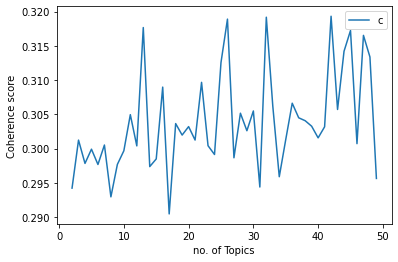

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

x=list(range(2,50,1))

plt.plot(x, coherence_values)
plt.xlabel("no. of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()